# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here").**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

**Read data**

In [48]:
train_df = pd.read_csv("titanic_train.csv", index_col="PassengerId")

In [49]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C


In [50]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [52]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [53]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

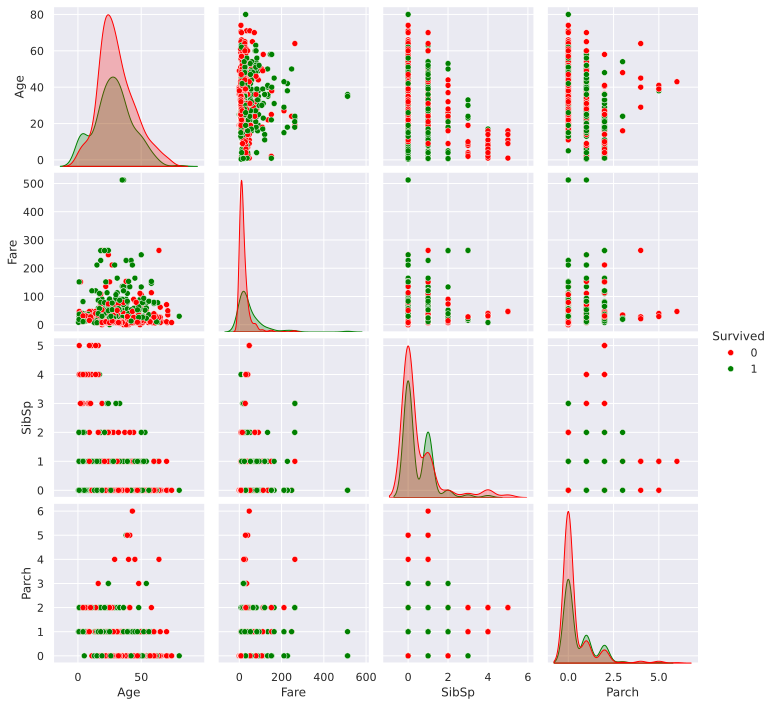

In [54]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
sns.pairplot(train_df[features], hue='Survived', palette={0: 'red', 1: 'green'})
plt.show()

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

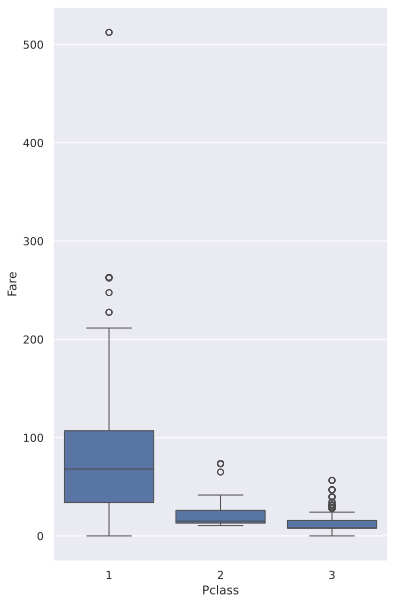

In [55]:
plt.figure(figsize=(6, 10))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.show()

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

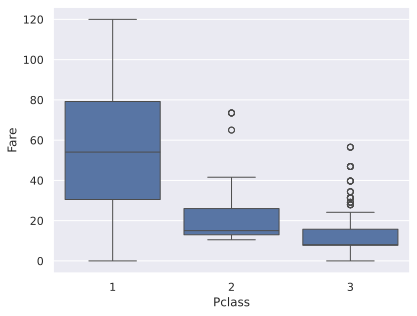

In [56]:
fare_95_percent = train_df["Fare"].quantile(0.95)
sns.boxplot(y="Fare", x="Pclass", data=train_df[train_df["Fare"] <= fare_95_percent])
plt.show()

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

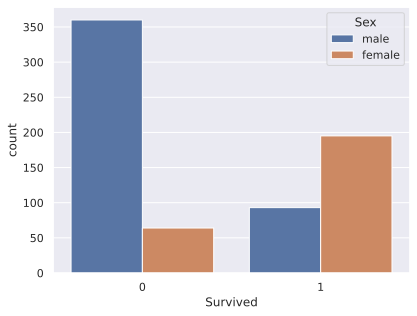

In [57]:
sns.countplot(data=train_df, hue="Sex", x="Survived")
plt.show()

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

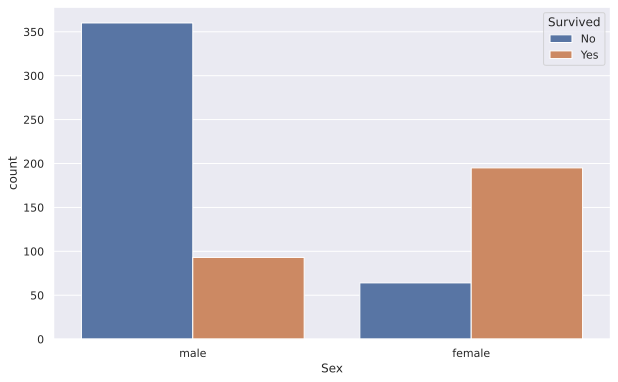

In [58]:
sns.boxplot(train_df, y="Fare", x="Survived")

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

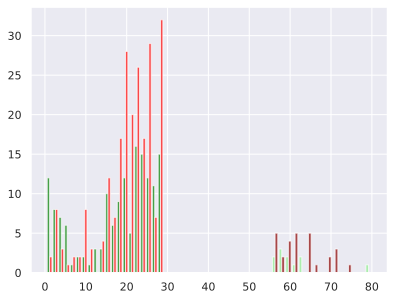

In [59]:
young = train_df[train_df['Age'] < 30]
old = train_df[train_df['Age'] > 55]
plt.hist([young[young['Survived'] == 1]['Age'], young[young['Survived'] == 0]['Age']],
         bins=20, alpha=0.7, label=['Young Survived', 'Young Perished'], color=['green', 'red'])
plt.hist([old[old['Survived'] == 1]['Age'], old[old['Survived'] == 0]['Age']],
         bins=15, alpha=0.7, label=['Old Survived', 'Old Perished'], color=['lightgreen', 'darkred'])
plt.show()

In [60]:
def age_group(age):
    if age < 30:
        return "<30"
    if age > 55:
        return ">55"

<Axes: xlabel='Survived', ylabel='proportion'>

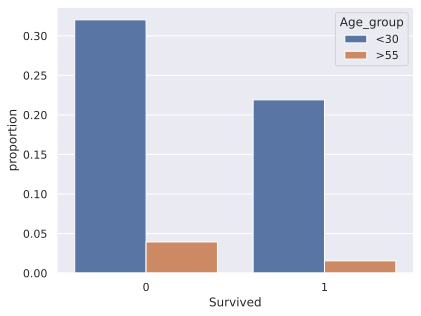

In [61]:
train_df["Age_group"] = train_df["Age"].apply(age_group)
sns.countplot(train_df, x="Survived", hue="Age_group", stat="proportion")